## Processing images with OpenCV

This Jupyter Notebook will lead you through the very basics of using OpenCV for feature detection. 

Upon completion of this notebook, you should be able to: 
* Import images using OpenCV  
* Use Harris corner and modern feature detectors to determine features. 
* Refine thresholds for feature detection 
* Use existing panorama/stitching tools in OpenCV to make a panorama
* Use existing optical flow algorithms to determine motion between two images

The first thing you will need is an image to find features on. You can take your own and store it on your machine, save an image with a creative commons license like those found on Wikipedia, or you can try to use a webcam to take your own photos. 

### Installing GTK+ UVC View (guvcview)
You can install an image viewer in Ubuntu to view and take photos from your camera. Please note that this is unlikely to work for built-in webcams if you are using a VM, but it should work for either USB webcams or if you are running Ubuntu on bare silicon.

To install guvcview, please follow the APT-based instructions found here: https://guvcview.sourceforge.net/downloads.html

### Installing OpenCV 
We'll be using Python, so please `pip3 install opencv-python` in a terminal

## Feature Detectors in Open CV 

This page has a nice overview on different feature detectors available in OpenCV: https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html

### Harris Corners

Our first stop is to try Harris Corner detection in Open CV. The code below is taken from this wonderful explainer about both the mathematics of Harris Corners and a demo: 
https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html

In [ ]:
import numpy as np
import cv2 as cv

filename = 'Fruit.jpg' #Please replace with path to your image file
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
 cv.destroyAllWindows()


Let's look at the `cv.cornerHarris` documentation to see what we can adjust. 
https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345

`cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	) -> 	dst`
where `src` is the input image array, `blockSize` is the neighborhood over which it computes the covariance matrix, `ksize` is the aperture parameter with a default of 3, and `k` is a Harris corner parameter that changes the difference between the determinants of the covariance matrix and the transpose of that matrix squared.

Try some (slightly) different values of `blockSize` to understand the effect on the number of features detected using Harris corners.

Try some different values of the threshold in the fourth to last line to understand its effect.


### SIFT Detector

As discussed in class, there are some non-idealities with scaling in Harris Corners. We can use other, more modern feature detectors instead to get results at different scales. 

From https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html :

In [1]:
import numpy as np
import cv2 as cv
img = cv.imread('Fruit.jpg') #You will need to change
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)

True

SIFT has been patented, and until recently required a license. The patent is now expired, but its patent status led to other open source feature detectors like ORB (ORiented FAST and rotated Brief)

More here: 
https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html

And the code: 

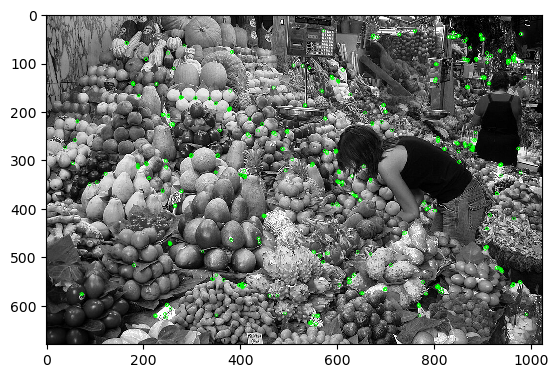

(<matplotlib.image.AxesImage at 0xffff99940dc0>, None)

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('Fruit.jpg', cv.IMREAD_GRAYSCALE)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()